In [28]:
import json
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter, freqz

In [29]:
with open("gunler/1/01.bmerawdata") as f:
    j = json.load(f)

In [30]:
j["rawDataBody"]["dataColumns"][:2]

[{'name': 'Sensor Index',
  'unit': '',
  'format': 'integer',
  'key': 'sensor_index',
  'colId': 1},
 {'name': 'Sensor ID',
  'unit': '',
  'format': 'integer',
  'key': 'sensor_id',
  'colId': 2}]

In [31]:
column_names = [el["name"] for el in j["rawDataBody"]["dataColumns"]]
column_names

['Sensor Index',
 'Sensor ID',
 'Time Since PowerOn',
 'Real time clock',
 'Temperature',
 'Pressure',
 'Relative Humidity',
 'Resistance Gassensor',
 'Heater Profile Step Index',
 'Scanning Mode Enabled',
 'Scanning Cycle Index',
 'Label Tag',
 'Error Code']

In [32]:
len(j["rawDataBody"]["dataBlock"])

31232

In [33]:
df = pd.DataFrame(j["rawDataBody"]["dataBlock"], columns=column_names)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31232 entries, 0 to 31231
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Sensor Index               31232 non-null  int64  
 1   Sensor ID                  31232 non-null  int64  
 2   Time Since PowerOn         31232 non-null  int64  
 3   Real time clock            31232 non-null  int64  
 4   Temperature                31232 non-null  float64
 5   Pressure                   31232 non-null  float64
 6   Relative Humidity          31232 non-null  float64
 7   Resistance Gassensor       31232 non-null  float64
 8   Heater Profile Step Index  31232 non-null  int64  
 9   Scanning Mode Enabled      31232 non-null  int64  
 10  Scanning Cycle Index       31232 non-null  int64  
 11  Label Tag                  31232 non-null  int64  
 12  Error Code                 31232 non-null  int64  
dtypes: float64(4), int64(9)
memory usage: 3.1 MB


In [35]:
df.describe().apply(lambda x: x.apply("{0:,.2f}".format))[
    ["Temperature", "Pressure", "Relative Humidity", "Resistance Gassensor"]]

,Temperature,Pressure,Relative Humidity,Resistance Gassensor
count,"31,232.00","31,232.00","31,232.00","31,232.00"
mean,40.67,922.69,29.19,"31,233,240.59"
std,1.84,0.26,6.32,"37,916,036.84"
min,28.44,921.95,18.55,"199,454.61"
25%,40.17,922.51,22.69,"4,285,639.50"
50%,41.11,922.71,29.15,"9,732,106.00"
75%,41.88,922.86,35.50,"43,545,516.00"
max,43.61,925.26,45.26,"102,400,000.00"


In [36]:
# df.to_excel("01.xlsx")

In [37]:
sensor_indexes = sorted(df["Sensor Index"].unique())
sensor_indexes

[0, 1, 2, 3, 4, 5, 6, 7]

In [38]:
sensor_1 = df[df["Sensor Index"] == 1]
sensor_1.head(25)

,Sensor Index,Sensor ID,Time Since PowerOn,Real time clock,Temperature,Pressure,Relative Humidity,Resistance Gassensor,Heater Profile Step Index,Scanning Mode Enabled,Scanning Cycle Index,Label Tag,Error Code
3,1,355881274,7879,1727089572,30.884274,922.340149,44.198517,1895857.5,0,1,1,0,0
5,1,355881274,8160,1727089573,30.789408,922.354736,43.922459,101685024.0,1,1,1,0,0
7,1,355881274,9560,1727089574,31.101475,922.393005,42.386570,92728688.0,2,1,1,0,0
21,1,355881274,13760,1727089578,31.455984,922.410767,38.610737,80511056.0,3,1,1,0,0
27,1,355881274,14459,1727089579,31.980261,922.424438,38.245010,7541542.0,4,1,1,0,0
29,1,355881274,15159,1727089580,32.314800,922.430054,37.847157,7358634.5,5,1,1,0,0
33,1,355881274,15859,1727089580,32.454609,922.425476,37.387459,7236749.0,6,1,1,0,0
35,1,355881274,16559,1727089581,32.729233,922.380859,36.990528,2513654.5,7,1,1,0,0
37,1,355881274,17259,1727089582,33.078758,922.408813,36.602177,3669429.0,8,1,1,0,0
43,1,355881274,17981,1727089582,33.251022,922.418701,36.172153,4396029.0,9,1,1,0,0


In [39]:
heater_idx_1 = sorted(sensor_1["Heater Profile Step Index"].unique())
heater_idx_1

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [40]:
sensors = {}
for i in sensor_indexes:
    sensors[i] = {}
    sensor = df[df["Sensor Index"] == i]
    heater_indexes = sorted(sensor["Heater Profile Step Index"].unique())
    for j in heater_indexes:
        sensors[i][j] = sensor[sensor["Heater Profile Step Index"] == j]

In [41]:
sensors[0][3]

,Sensor Index,Sensor ID,Time Since PowerOn,Real time clock,Temperature,Pressure,Relative Humidity,Resistance Gassensor,Heater Profile Step Index,Scanning Mode Enabled,Scanning Cycle Index,Label Tag,Error Code
20,0,355892538,13755,1727089578,30.872171,922.064575,38.612717,63076036.0,3,1,1,0,0
70,0,355892538,24585,1727089589,31.448151,922.062927,35.142670,102400000.0,3,1,1,0,0
115,0,355892538,35459,1727089600,31.823795,922.044434,33.476299,102400000.0,3,1,1,0,0
168,0,355892538,46235,1727089611,32.116795,922.068604,32.633564,102400000.0,3,1,1,0,0
216,0,355892538,57090,1727089621,32.324654,922.044067,32.250610,102400000.0,3,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31027,0,355892538,6919073,1727096484,40.188488,922.614502,22.416792,102400000.0,3,1,1,0,0
31074,0,355892538,6929954,1727096495,40.138397,922.617920,22.391634,102400000.0,3,1,1,0,0
31122,0,355892538,6940837,1727096506,40.333748,922.632690,22.292919,102400000.0,3,1,1,0,0
31171,0,355892538,6951709,1727096517,40.236076,922.622803,22.334211,102400000.0,3,1,1,0,0


In [42]:
len(sensors[0])

10

In [43]:
def plot_sensor(sensor):
    plt.figure(figsize=(12, 6))
    plt.title(f"Sensor {sensor}")
    plt.yscale("log")
    for profile_idx in sensors[sensor]: 
        plt.plot(sensors[sensor][profile_idx]["Resistance Gassensor"])
    plt.show()

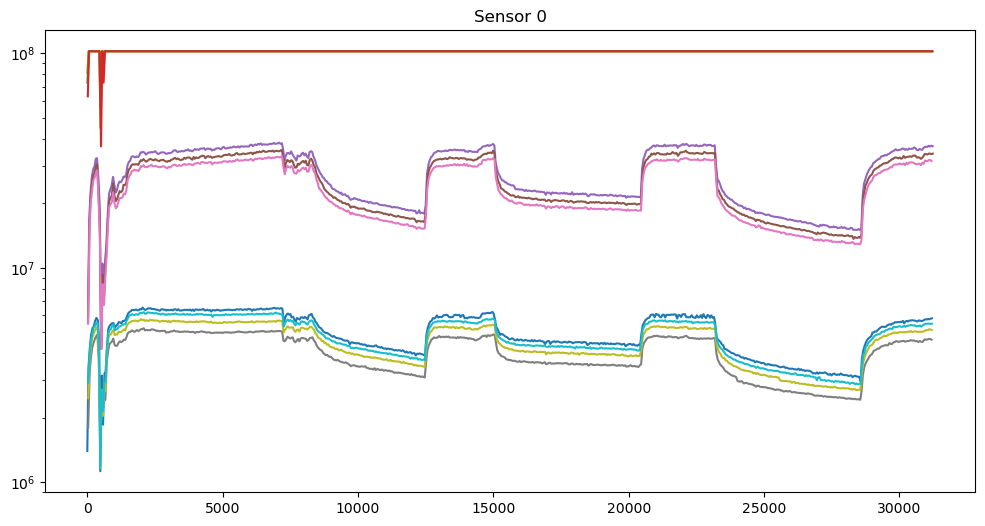

In [44]:
plot_sensor(0)

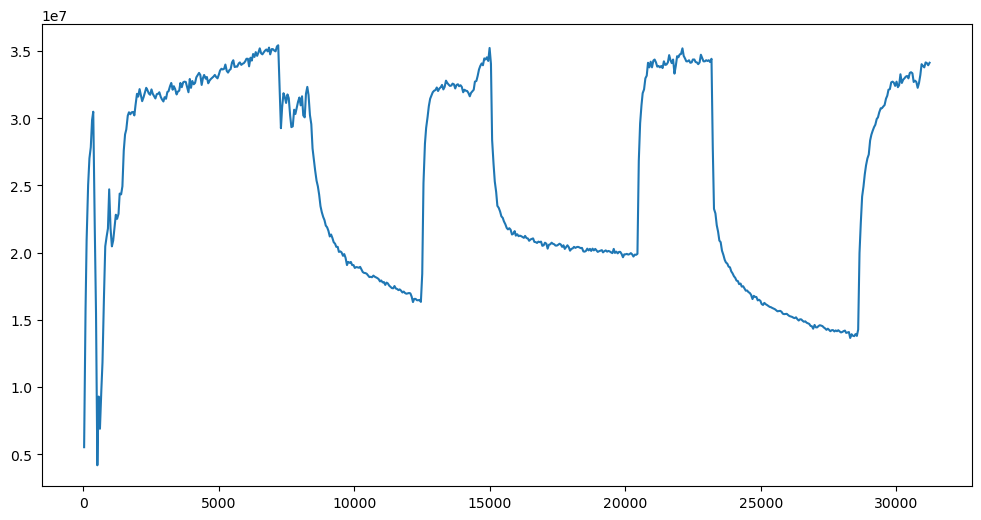

In [45]:
s_0_5 = sensors[0][5]["Resistance Gassensor"]
s_0_5_idx = s_0_5.index
s_0_5_vals = s_0_5.values
plt.figure(figsize=(12, 6))
plt.plot(s_0_5_idx, s_0_5_vals)
plt.show()

In [46]:
type(s_0_5_vals)

numpy.ndarray

In [47]:
def butter_lowpass(cutoff, fs, order=5):
    return butter(order, cutoff, fs=fs, btype="low", analog=False)


def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

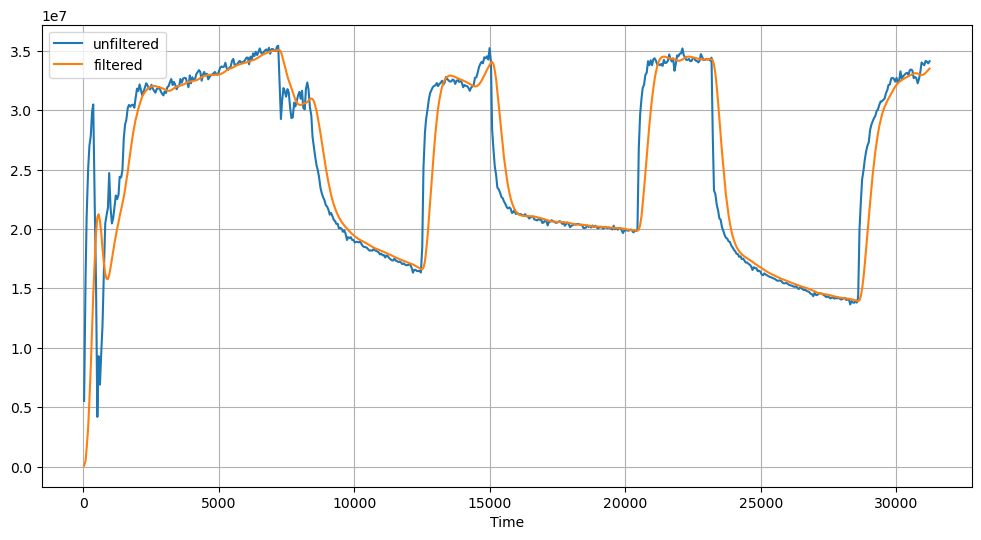

In [63]:
order = 2
fs = 100.0
cutoff = 4
b, a = butter_lowpass(cutoff, fs, order)
y = butter_lowpass_filter(s_0_5_vals, cutoff, fs, order)

plt.figure(figsize=(12, 6))
plt.plot(s_0_5_idx, s_0_5_vals, label="unfiltered")
plt.plot(s_0_5_idx, y, label="filtered")
plt.xlabel('Time')
plt.grid()
plt.legend()
plt.show()